In [2]:

#Assignment 6: Implementation of object detection using transfer learning of CNN architectures

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir='Desktop/mnist/mnistpng/train/'
test_dir ='mnist/mnistpng/test/'


In [4]:
img_gen=ImageDataGenerator(rescale=1.0/255)
data_gen=img_gen.flow_from_directory(
    train_dir,
    target_size=(32,32),
    batch_size=5000,
    shuffle=True,
    class_mode='categorical'
)

Found 60000 images belonging to 10 classes.


In [5]:
x_train,y_train=data_gen[0]
x_test,y_test=data_gen[2]

In [6]:

from tensorflow.keras.applications import VGG16
path = 'Desktop/mnist/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg_model = VGG16 (weights=path, include_top=False, input_shape=(32,32,3))

In [7]:
for layer in vgg_model.layers:
    layer.trainabler=False

In [8]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [9]:
custom_classifier = keras.Sequential([

    Flatten(),
    Dense(100, activation= 'relu'),
    Dropout (0.2),
    Dense(100, activation= 'relu'),
    Dropout (0.2),
    Dense (10, activation='softmax')
])
model=keras.Sequential([
    vgg_model,
    custom_classifier
])

In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 [==============================] - 174s 3s/step - loss: 2.5083 - accuracy: 0.1298 - val_loss: 2.1432 - val_accuracy: 0.2140


In [12]:
for layer in vgg_model.layers[:-4]:
    layer.trainable=True

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=100, epochs=1, validation_data=(x_test,y_test))

50/50 [==============================] - 176s 3s/step - loss: 1.7777 - accuracy: 0.3348 - val_loss: 0.9486 - val_accuracy: 0.6850


In [14]:
loss,acc=model.evaluate(x_test,y_test)
print(loss, " ",acc)

157/157 [==============================] - 10s 59ms/step - loss: 0.9486 - accuracy: 0.6850
0.9485936760902405   0.6850000023841858


In [15]:
pred=model.predict(x_test)

157/157 [==============================] - 10s 61ms/step


In [16]:
labels=list(data_gen.class_indices.keys())

4


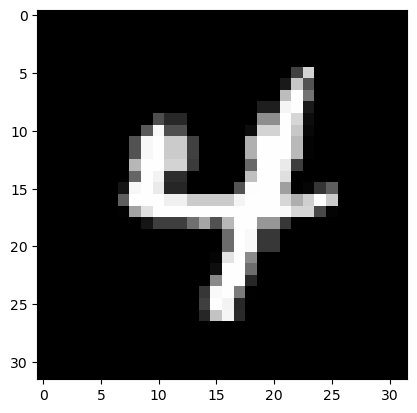

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[5])
print(str(labels[np.argmax(y_test[5])]))

In [18]:
y_test[5]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)